# Estimación de F (modelos no paramétricos)

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

## Función de distribución empírica

La función de distribución empírica para una muestra $X_1,...,X_n \sim F $ se define  $$\hat{F_n}(x) = \frac{1}{n} \sum_{i=1}^{n}I(X_i\leq x) $$

Es decir, le aplica PMF $ p_{X_i}(x) = p(X_i=x) = \frac{1}{n}$ a cada $X_i$

### Importo datos

Busco $n=100$ datos para estimar la distribución subyacente. Para el ejemplo voy a sacarlos de [este repositorio](https://www.kaggle.com/datasets/tentotheminus9/gravity-spy-gravitational-waves) pero pueden probar con cualquier dataset. En este caso son muestras de tiempos de duración de glitches encontrados en mediciones de LIGO.

In [ ]:
!pip install gdown

# Download the file using gdown
!gdown 1BYjpp3wR3QcGS00ZA-i2-eQk69N1yYNC

In [4]:
datos = pd.read_csv('trainingset_v1d1_metadata.csv', delimiter=',')
datos.head()

,event_time,ifo,peak_time,peak_time_ns,start_time,start_time_ns,duration,search,process_id,event_id,...,chisq_dof,param_one_name,param_one_value,gravityspy_id,label,sample_type,url1,url2,url3,url4
0,1.134216e+09,L1,1134216192,931639909,1134216192,832031011,0.18750,Omicron,0,21,...,0,phase,-2.72902,zmIdpucyOG,Whistle,train,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...
1,1.129360e+09,L1,1129359781,558593034,1129359781,47851085,0.94238,Omicron,0,107,...,0,phase,1.10682,zWFRqqDxwv,Whistle,test,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...
2,1.127425e+09,L1,1127425468,976317882,1127425468,960937023,0.04688,Omicron,0,218,...,0,phase,-0.83099,zKCTakFVcf,Whistle,train,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...
3,1.132637e+09,L1,1132636755,365233898,1132636754,951172113,0.82422,Omicron,0,88,...,0,phase,0.76242,z14BdoiFZS,Whistle,validation,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...
4,1.132036e+09,L1,1132035853,197264909,1132035852,933837890,2.00366,Omicron,0,16,...,0,phase,-0.31161,yyjqLCtAmO,Whistle,validation,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...


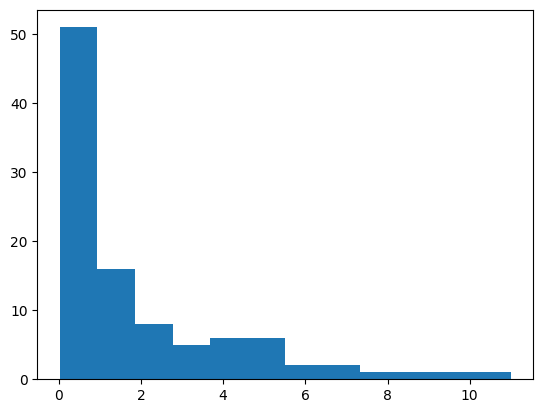

In [5]:
#Importo una muestra cualquiera
n = 100
sample_data = datos['duration'].sample(n=n)
sample = sample_data.values
plt.hist(sample,bins='auto')
plt.show()

In [6]:
#Defino la distribución empírica F_hat
F_hat = stats.ecdf(sample)

In [9]:
type(F_hat)

scipy.stats._survival.ECDFResult

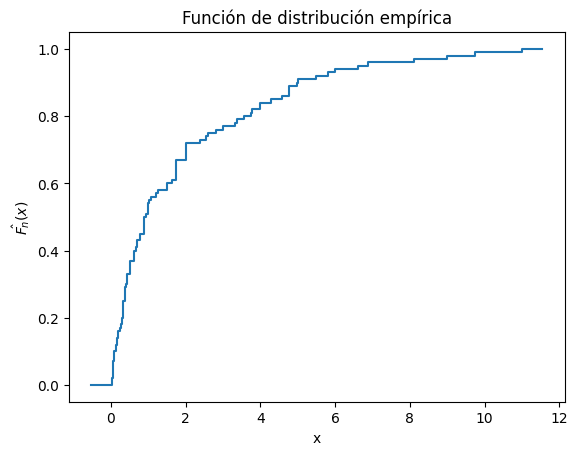

In [10]:
#Defino la distribución empírica F_hat
F_hat = stats.ecdf(sample)

#Para trabajar con la CDF invocamos al atributo cdf y graficamos
ax = plt.subplot()
F_hat.cdf.plot(ax)
ax.set_xlabel('x')
ax.set_ylabel(r'$\hat{F_n}(x)$')
plt.title('Función de distribución empírica')
plt.show()

[1. 2. 3. 4.]
[0.2 0.6 0.8 1. ]
0.6


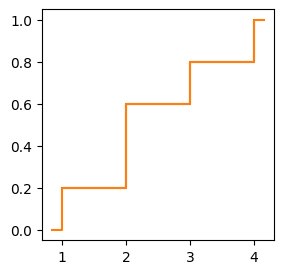

In [21]:
x_ejemplo = [3,1,2,4,2]
F_hat_ejemplo = stats.ecdf(x_ejemplo)

x_ordenados = F_hat_ejemplo.cdf.quantiles
F_probabilidades = F_hat_ejemplo.cdf.probabilities
print(x_ordenados)
print(F_probabilidades)

plt.figure(figsize=(3, 3))
ax = plt.subplot()
ax.step(x_ordenados,F_probabilidades,where='post')
F_hat_ejemplo.cdf.plot(ax)

print(F_hat_ejemplo.cdf.evaluate(2.0))

In [11]:
#F_hat.cdf tiene, a su vez, dos atributos:
x = F_hat.cdf.quantiles #array con los (X_1,...,X_n) de la muestra ordenados de menor a mayor

In [12]:
x

array([ 0.02734   ,  0.03125   ,  0.04688   ,  0.05859   ,  0.0625    ,
        0.06641   ,  0.08594   ,  0.09033   ,  0.09375   ,  0.125     ,
        0.14061999,  0.15625   ,  0.1875    ,  0.25      ,  0.25781   ,
        0.29236001,  0.29297   ,  0.3125    ,  0.375     ,  0.39453   ,
        0.42774001,  0.43164   ,  0.4375    ,  0.5       ,  0.625     ,
        0.67919999,  0.68848002,  0.70911002,  0.78223002,  0.78417999,
        0.875     ,  0.88085997,  0.89844   ,  0.9375    ,  0.99219   ,
        1.        ,  1.00781   ,  1.0625    ,  1.19921994,  1.25      ,
        1.5       ,  1.625     ,  1.75      ,  2.        ,  2.01074004,
        2.39404011,  2.54883003,  2.58643007,  2.8125    ,  3.        ,
        3.30890012,  3.37987995,  3.56006002,  3.75      ,  3.78272009,
        4.        ,  4.28710985,  4.58593988,  4.75976992,  4.76562023,
        4.76758003,  4.98730993,  5.        ,  5.5       ,  5.8125    ,
        6.        ,  6.60937977,  6.875     ,  8.125     ,  9.  

In [13]:
F = F_hat.cdf.probabilities #array con la CDF para cada valor correspondiente de x
F

array([0.01, 0.02, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11, 0.12,
       0.14, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.25, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.37, 0.4 , 0.41, 0.42, 0.43, 0.44, 0.45, 0.48, 0.49, 0.5 ,
       0.51, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.6 , 0.61, 0.67, 0.71,
       0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8 , 0.81, 0.82,
       0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94,
       0.95, 0.96, 0.97, 0.98, 0.99, 1.  ])

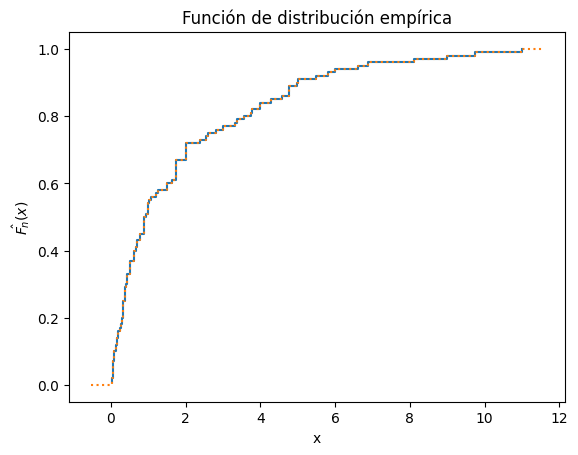

In [23]:
ax = plt.subplot()
ax.step(x,F,where='post') #manuealmente
F_hat.cdf.plot(ax,ls=':') #automaticamente

ax.set_xlabel('x')
ax.set_ylabel(r'$\hat{F_n}(x)$')
plt.title('Función de distribución empírica')
plt.show()

In [24]:
#Para evaluar F_hat en un valor arbitrario de x podemos usar el método evaluate(x)
F_hat.cdf.evaluate(2.0)

array(0.71)

In [ ]:
# np.random.seed(42)
# sample = np.random.normal(loc=0, scale=1, size=100)

### Funcionales estadísticos

Llamamos $T(F)$ a un funcional estadístico de una distribución $F$. Es cualquier cantidad que se pueda calcular como función de $F$ (ej: promedio, varianza, cuantiles, etc.)

Para obtener estimar cualquier $T(F)$ podemos usar el estimador "plug-in", que es simplemente reemplazar $F$ con $\hat{F_n}$.

Por ejemplo, la media de una variable aleatoria $X \sim F$ es

$$ \mu = E(X) =  \sum_{x}x p_X(x) \hspace{1cm} \text{(caso discreto)}$$
$$ \mu = E(X) =  \int x f_X(x)dx \hspace{1cm} \text{(caso continuo)} $$

Entonces, el estimador plug-in de $\mu$ será
$$\hat{\mu} = \frac{1}{n}\sum_{i=1}^{n}X_i$$

es decir, el promedio muestral.

Resumidamente, podemos estimar cualquier funcional estadístico por su contraparte muestral.

In [25]:
#algunas características muestrales

#promedio
mean = np.mean(sample)

#varianza
var = np.var(sample)

#desvío estándar (sqrt(var))
std = np.std(sample)

#mediana
median = np.median(sample)

#cuantiles
quantile = np.quantile(sample,q = 0.25)


print('media =',mean)
print('mediana =',median)
print('std =',std)
print('25-cuartil =',quantile)

media = 1.9385826001502573
mediana = 0.9179700016975405
std = 2.3074025550886326
25-cuartil = 0.359375


In [26]:
#asimetría: si es negativa, tiene una cola más larga a la izquierda; positiva, a la derecha
skewness = stats.skew(sample)

#correlación
sample_id = sample_data.index
sample_2 = datos.loc[sample_id, 'amplitude'].values
correlation = stats.pearsonr(sample,sample_2).statistic

print('asimetría = ',skewness)
print('correlación con Y:amplitud =',correlation)

asimetría =  1.783922425458854
correlación con Y:amplitud = 0.39542136442423825


### Intervalos de confianza

Podemos construír un intervalo de confianza de nivel $1-\alpha$ para $F$ donde los bordes inferiores y superiores $L(x)$ y $U(x)$ son:
$$ L(x) = \max(\hat{F_n}(x)-\epsilon_n,0)$$
$$ U(x) = \min(\hat{F_n}(x)+\epsilon_n,1)$$

con $ \epsilon_n = \sqrt{\frac{1}{2n}\log(\frac{2}{\alpha})} $

Con estos valores, $P(L(x)\leq F(x) \leq U(x) )\geq 1-\alpha$ para cualquier $F$.

**$\hat{F_n}(x)$ es la función de distribución acumulada empírica**

In [27]:
def confidence_interval_dkw(ecdf,alpha=0.05):
  L = []
  U = []
  n = len(ecdf.probabilities)
  epsilon_n = np.sqrt(np.log(2/alpha)/(2*n))
  for i in range(0,n):
    L_i = np.max([ecdf.probabilities[i]-epsilon_n,0])
    U_i = np.min([ecdf.probabilities[i]+epsilon_n,1])
    L.append(L_i)
    U.append(U_i)
  return L,U

low,up = confidence_interval_dkw(F_hat.cdf,alpha=0.05)

Text(0.5, 1.0, 'Función de distribución empírica')

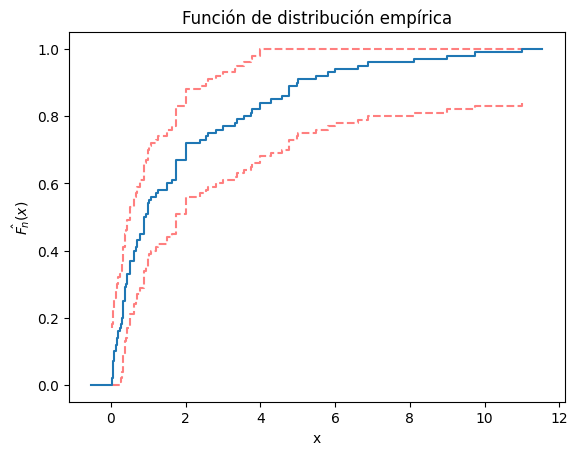

In [30]:
ax = plt.subplot()
ax.step(x,low,'r--',alpha=0.5,where='post')
ax.step(x,up,'r--',alpha=0.5,where='post')
F_hat.cdf.plot(ax)
ax.set_xlabel('x')
ax.set_ylabel(r'$\hat{F_n}(x)$')
plt.title('Función de distribución empírica')


### Ejemplo con F~N(0,1)

Empecemos generando una muestra aleatoria $$X_1,...,X_{100} \sim \mathcal{N}(0,1) $$

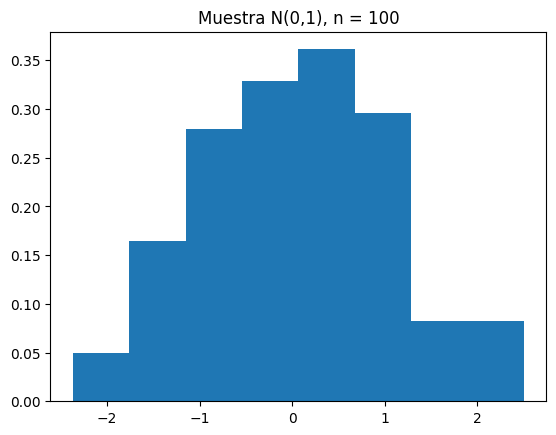

In [31]:
mu = 0
sigma = 1
n = 100

norm_sample = stats.norm.rvs(size=n,loc=mu,scale=sigma)

plt.hist(norm_sample, density=True, bins='auto')
plt.title('Muestra N(0,1), n = {}'.format(n))
plt.show()

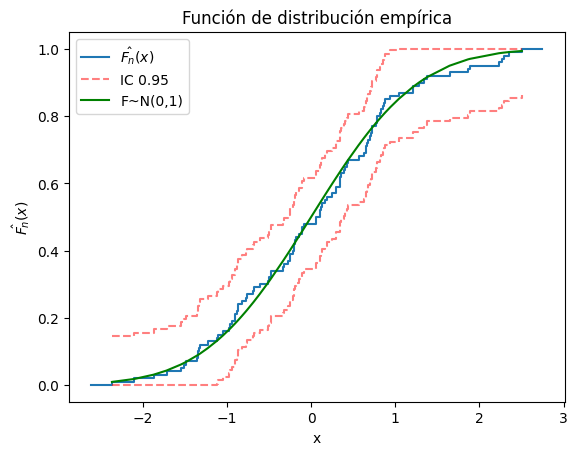

In [34]:
#norm_sample = stats.norm.rvs(size=n,loc=mu,scale=sigma)
F_hat = stats.ecdf(norm_sample)
x = F_hat.cdf.quantiles
F = F_hat.cdf.probabilities

alpha = 0.05  #0.5
low,up = confidence_interval_dkw(F_hat.cdf,alpha=alpha)


ax = plt.subplot()
F_hat.cdf.plot(ax,label=r'$\hat{F_n}(x)$')
ax.step(x,low,'r--',alpha=0.5,where='post',label='IC {}'.format(1-alpha))
ax.step(x,up,'r--',alpha=0.5,where='post')
ax.plot(x,stats.norm.cdf(x),color='g',label='F~N(0,1)')
ax.set_xlabel('x')
ax.set_ylabel(r'$\hat{F_n}(x)$')
plt.title('Función de distribución empírica')
plt.legend()

### Ejercicio
Repetir el experimento 1000 veces con un IC de nivel 0.95 y registrar en cuántos casos el intervalo de confianza contiene **completamente** la función de distribución verdadera.

### Error y desvío estándar de $\hat{\mu}$
Particularmente para el estimador del promedio $\hat{\mu} = \bar{X_n}$ podemos calcular su desvío estándar, ya que es el error estándar del promedio muestral.

$$\text{se}(\hat{\mu}) = \sqrt{\text{var}(\bar{X_n})} = \frac{\sigma}{\sqrt{n}} $$

donde $\sigma$ es el desvío estándar de $X\sim F$.

Por lo tanto, para estimar $\text{se}(\hat{\mu})$, reemplazamos $\sigma$ por $\hat{\sigma} = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(X_i-\bar{X_n})^{2}}$, el desvío estándar muestral.

También podemos estimar un intervalo de confianza de nivel $1-\alpha$ para $\hat{\mu}$ como
$$\hat{\text{IC}}(\hat{\mu}) = \hat{\mu} \pm z_{\frac{\alpha}{2}}\hat{\text{se}} $$

In [35]:
mean = np.mean(sample)
se_mean = std/np.sqrt(n)

alpha = 0.05
low = mean - stats.norm.ppf(1-alpha/2)*se_mean
up = mean + stats.norm.ppf(1-alpha/2)*se_mean

print('promedio =',mean)
print('error estándar del promedio =',se_mean)
print('IC = ',[low,up])

promedio = 1.9385826001502573
error estándar del promedio = 0.23074025550886326
IC =  [np.float64(1.4863400095693156), np.float64(2.3908251907311993)]


### Ejercicio comparación de dos muestras

Tenemos muestras de tamaños de cráneos masculinos encontrados en Egipto que corresponden a dos épocas distintas. Los datos vienen de [este repositorio](https://dasl.datadescription.com/datafile/egyptians/?_sfm_methods=Comparing+Groups&_sfm_cases=4+59943).

Queremos saber si la media de los cráneos es la misma o cambió de una época a la otra. Para eso, hallar un estimador de $\theta = \mu_1-\mu_2$ y proporcionar un error estándar y un interavalo de confianza para este estimador. Decidir si son distintos o no

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

datos = pd.read_csv('egyptians.txt', delimiter='\t')

datos.head()

,4000 BCE,200 BCE
0,131,141
1,125,141
2,131,135
3,119,133
4,136,131


Hay que usar $$\hat{\theta} = \hat{\mu_2}-\hat{\mu_1}$$
$$\hat{\text{se}}(\hat{\theta}) = \sqrt{\hat{\text{var}}(\hat{\mu_2}-\hat{\mu_1})} = \sqrt{\hat{\text{se}}(\hat{\mu_2})^{2}+\hat{\text{se}}(\hat{\mu_1})^{2}}$$

In [ ]:
bce_4000 = np.array(datos['4000 BCE'].values)
bce_200 = np.array(datos['200 BCE'].values)

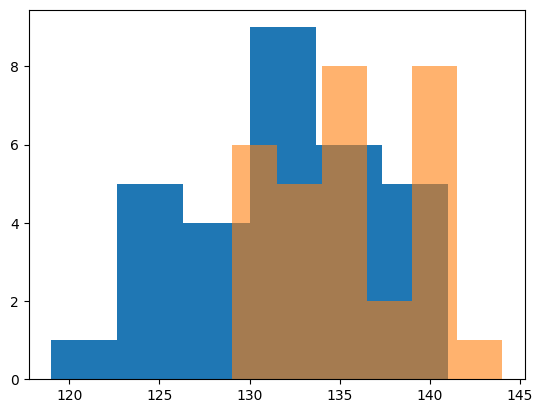

In [21]:
plt.hist(bce_4000,bins='auto')
plt.hist(bce_200,bins='auto', alpha=0.6)
plt.show()

In [ ]:
media_4000 = np.mean(bce_4000)
media_200 = np.mean(bce_200)

theta = media_200 - media_4000

print('theta: ', theta)


theta:  4.2666666666666515


In [ ]:
# se(u) = sqrt(Var(u)/n) = sigma/sqrt(n)
se_media_4000 = np.std(bce_4000)/np.sqrt(len(bce_4000))
se_media_200 = np.std(bce_200)/np.sqrt(len(bce_200))

se_theta = np.sqrt(se_media_4000**2 + se_media_200**2)

print('se_media_4000: ', se_media_4000)
print('se_media_200: ', se_media_200)
print('se_theta: ', se_theta)                             

se_4000:  0.9207283751143658
se_200:  0.7249265607759993
se_theta:  1.171861450538953


In [ ]:
# IC = [theta - z*se(theta), theta + z*se(theta)]
alpha = 0.05
low = theta - stats.norm.ppf(1-alpha/2)*se_theta
up = theta + stats.norm.ppf(1-alpha/2)*se_theta

print('IC = ',[low,up])

promedio = 4.2666666666666515
error estándar del promedio = 1.171861450538953
IC =  [np.float64(1.9698604287394375), np.float64(6.563472904593866)]


IC =  [1.9698604287394375, 6.563472904593866]
